In [2]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import pandas as pd
from astropy.cosmology import Planck13

In [3]:
# Load data
gkvScienceSpevObj = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/GAMA/merged/gkvScinence-SpectObj27/gkvScienceSpevObj.fits')[1].data
SDSS = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/SDSS/SDSS_DR7/SDSS_DR7.fits')[1].data
#SDSS = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/SDSS/SDSS_atlas/sdss_atlas.fits')[1].data

print('number of objects in gkvSCIENCE_raw:', len(gkvScienceSpevObj))
print('number of objects in SDSS:          ', len(SDSS))
print(max(SDSS['Z']))
SDSS =SDSS[ (SDSS['SPECTROTYPE']=="GALAXY")]


number of objects in gkvSCIENCE_raw: 425117
number of objects in SDSS:           927552
0.6998667


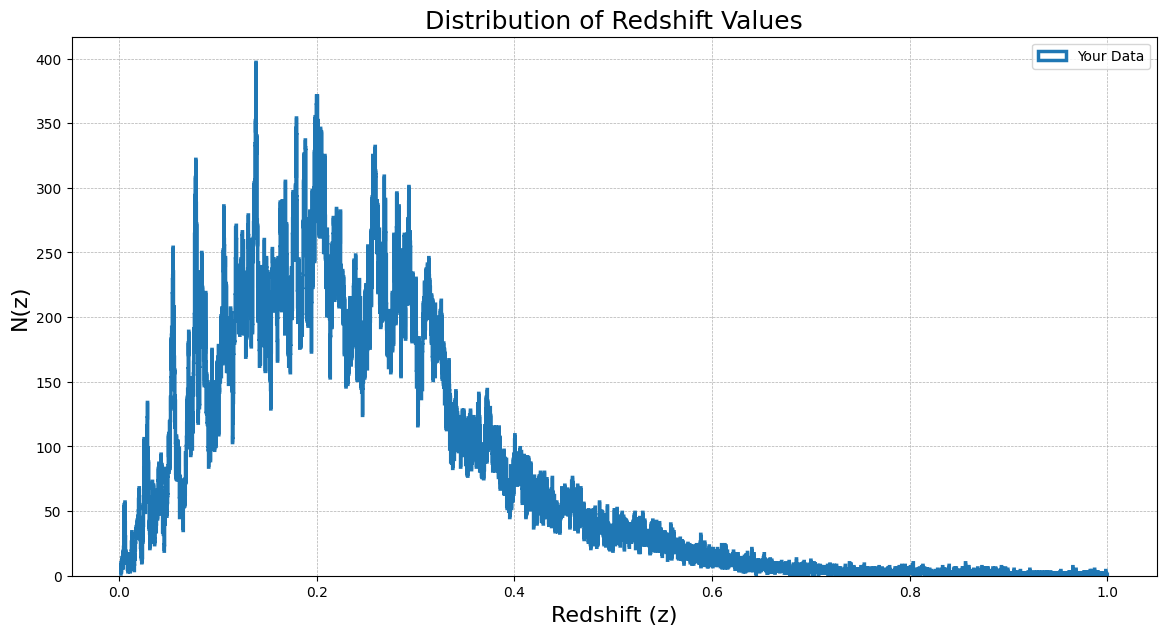

In [17]:

bins = np.linspace(0.002, 1, 5000)

# Plotting the histograms
fig, ax = plt.subplots(figsize=(14, 7))

# Plot histogram for z values
plt.hist(gkvScienceSpevObj['z'], bins=bins, histtype='step', linewidth=2.5, label='Your Data')

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Redshift (z)', fontsize=16)
plt.ylabel('N(z)', fontsize=16)
plt.title('Distribution of Redshift Values', fontsize=18)
plt.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [32]:
# Functions

def load_region_to_dataframe(name_of_region, MS_dict):
    df = pd.DataFrame()
    region_data = MS_dict[name_of_region]

    df['RAcen'] = region_data['RAcen'].byteswap().newbyteorder()
    df['Z'] = region_data['Z'].byteswap().newbyteorder()

    # Check if DataFrame is not empty
    if not df.empty:
        df = df[df['Z'] != -9.999]

        # Check if 'Z' column is not empty
        if not df['Z'].empty:
            df['lookbacktime'] = Planck13.lookback_time(df['Z']).value

    return df

def fix_data_format(data):
    return data.byteswap().newbyteorder()

In [33]:
# Define GAMA regions
regions_of_sky = {
    'G02': {'RAcen': (30.20, 38.80), 'DECcen': (-10.25, -3.72)},
    'G09': {'RAcen': (129.0, 141.0), 'DECcen': (-2.0, 3.0)},
    'G12': {'RAcen': (174.0, 186.0), 'DECcen': (-3.0, 2.0)},
    'G15': {'RAcen': (211.5, 223.5), 'DECcen': (-2.0, 3.0)},
    'G23': {'RAcen': (339.0, 351.0), 'DECcen': (-35.0, -30.0)},
}

In [34]:
# GAMA MS regions

MS_regions = ['G09', 'G12', 'G15', 'G23']
MS = {region_name: regions_of_sky[region_name] for region_name in MS_regions}

# Load GAMA data for each region
MS_GAMA_objects = {region_name: gkvScienceSpevObj[(
        (gkvScienceSpevObj['RAcen'] >= region_params['RAcen'][0]) & (gkvScienceSpevObj['RAcen'] <= region_params['RAcen'][1]) &
        (gkvScienceSpevObj['DECcen'] >= region_params['DECcen'][0]) & (gkvScienceSpevObj['DECcen'] <= region_params['DECcen'][1])
)] for region_name, region_params in MS.items()}

In [35]:
# Apply masks to G09, G12, G15, and G23
for region_name, objects in MS_GAMA_objects.items():
    masks = (
            (objects['uberclass'] == 1) &
            (objects['duplicate'] == False) &
            (objects['mask'] == False) &
            (objects['starmask'] == False) &
            (objects['NQ'] > 2)
    )
    MS_GAMA_objects[region_name] = objects[masks]

count_MS_GAMA = sum(len(objects) for objects in MS_GAMA_objects.values())

In [36]:
# Load GAMA data for each region into dataframes
dataframes_GAMA = {region: load_region_to_dataframe(region, MS_GAMA_objects) for region in MS.keys()}

# Load data for all regions and combine
combined_dataframe = pd.concat(dataframes_GAMA.values())
combined_dataframe['RA_rad'] = np.deg2rad(combined_dataframe['RAcen'].values)
print('MS data frame:')
print('Length of MS dataframe:',len(combined_dataframe))
print(combined_dataframe)

MS data frame:
Length of MS dataframe: 233832
           RAcen        Z  lookbacktime    RA_rad
0      140.99963  0.22764      2.803570  2.460908
1      140.99921  0.08638      1.171445  2.460900
2      140.99892  0.38656      4.299894  2.460895
3      140.99888  0.28473      3.378142  2.460895
4      140.99879  0.27967      3.328991  2.460893
...          ...      ...           ...       ...
41506  339.00258  0.28287      3.360114  5.916711
41507  339.00167  0.09887      1.329136  5.916695
41508  339.00092  0.13522      1.772530  5.916682
41509  339.00075  0.16673      2.139000  5.916679
41510  339.00058  0.20921      2.608335  5.916676

[233832 rows x 4 columns]


In [37]:
# GAMA MS Plus

MS_plus_regions = ['G02', 'G09', 'G12', 'G15', 'G23']
MS_plus = {region_name: regions_of_sky[region_name] for region_name in MS_plus_regions}

# Load GAMA data for each region
MS_plus_GAMA_objects = {region_name: gkvScienceSpevObj[(
        (gkvScienceSpevObj['RAcen'] >= region_params['RAcen'][0]) & (gkvScienceSpevObj['RAcen'] <= region_params['RAcen'][1]) &
        (gkvScienceSpevObj['DECcen'] >= region_params['DECcen'][0]) & (gkvScienceSpevObj['DECcen'] <= region_params['DECcen'][1])
)] for region_name, region_params in MS_plus.items()}

count_MS_plus_GAMA = sum(len(objects) for objects in MS_plus_GAMA_objects.values())

# Load GAMA data for each region into dataframes for MS_plus
dataframes_plus_GAMA = {region: load_region_to_dataframe(region, MS_plus_GAMA_objects) for region in MS_plus.keys()}

# Load data for all regions and combine for MS_plus
combined_dataframe_plus = pd.concat(dataframes_plus_GAMA.values())
combined_dataframe_plus['RA_rad'] = np.deg2rad(combined_dataframe_plus['RAcen'].values)

/home/farnoosh/.local/lib/python3.10/site-packages/astropy/cosmology/flrw/base.py:976: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._lookback_time_integrand_scalar, 0, z)[0]
/home/farnoosh/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in _integral_lookback_time (vectorized)
  outputs = ufunc(*inputs)
/home/farnoosh/.local/lib/python3.10/site-packages/astropy/cosmology/flrw/base.py:976: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._lookback_time_integrand_scalar, 0, z)[0]
/home/farnoosh/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in _integral_lookback_time (vectorized)
  outputs = u

In [38]:
print('MS Plus dataframe:')
print(len(combined_dataframe_plus))
print(MS_plus_GAMA_objects.keys())
print(combined_dataframe_plus)

MS Plus dataframe:
405052
dict_keys(['G02', 'G09', 'G12', 'G15', 'G23'])
           RAcen        Z  lookbacktime    RA_rad
0       38.79967  0.29779      3.503467  0.677182
1       38.79954  0.18552      2.350003  0.677180
2       38.79937  0.29436      3.470765  0.677177
3       38.79912  0.14006      1.829875  0.677172
4       38.79892  0.17688      2.253662  0.677169
...          ...      ...           ...       ...
69157  339.00167  0.09887      1.329136  5.916695
69158  339.00092  0.13522      1.772530  5.916682
69159  339.00075  0.16673      2.139000  5.916679
69160  339.00075  0.16673      2.139000  5.916679
69161  339.00058  0.20921      2.608335  5.916676

[405052 rows x 4 columns]


the lookback time t(z) at a given redshift z, where H0 is the Hubble constant, Ωm is the matter density parameter, and ΩΛ is the dark energy density parameter. The integral is evaluated from 0 to z.
since H0 is in (km/s.Mpc) and the Omegas are dimetionless, so the time t(z) is in Gyr

<font size="5">

$$ t(z) = \frac{1}{H_0} \int_0^z \frac{(1+z')}{\sqrt{\Omega_m (1+z')^3 + \Omega_\Lambda}} \, dz' $$

In [53]:
# Create dataframe for SDSS data

SDSS_objects = pd.DataFrame({
    'Z': fix_data_format(SDSS['Z']),
    'RAcen': fix_data_format(SDSS['RAcen']),
})
SDSS_objects = SDSS_objects[SDSS_objects['Z'] != -9.999]
SDSS_objects['RA_rad'] = np.deg2rad(SDSS_objects['RAcen'].values)
SDSS_objects['lookbacktime'] = Planck13.lookback_time(SDSS_objects['Z']).value
print("SDSS OBJECTS:")
print(SDSS_objects)
print('Z_max SDSS:           ', max(SDSS_objects['Z']))
print('lookbacktime_Max_SDSS:', max(SDSS_objects['lookbacktime']))

SDSS OBJECTS:
               Z       RAcen    RA_rad  lookbacktime
0       0.021275  146.714203  2.560646      0.302248
1       0.213925  146.919449  2.564228      2.658750
2       0.126554  146.859833  2.563188      1.668871
3       0.448645  146.763397  2.561504      4.804257
4       0.055988  146.963898  2.565004      0.775795
...          ...         ...       ...           ...
925887  0.033870  260.743164  4.550827      0.476817
925888  0.159622  260.800568  4.551828      2.057739
925889  0.167358  260.716003  4.550353      2.146146
925890  0.111548  260.697235  4.550025      1.486371
925891  0.223957  260.716248  4.550357      2.764950

[925892 rows x 4 columns]
Z_max SDSS:            0.6998667120933533
lookbacktime_Max_SDSS: 6.484978735783145


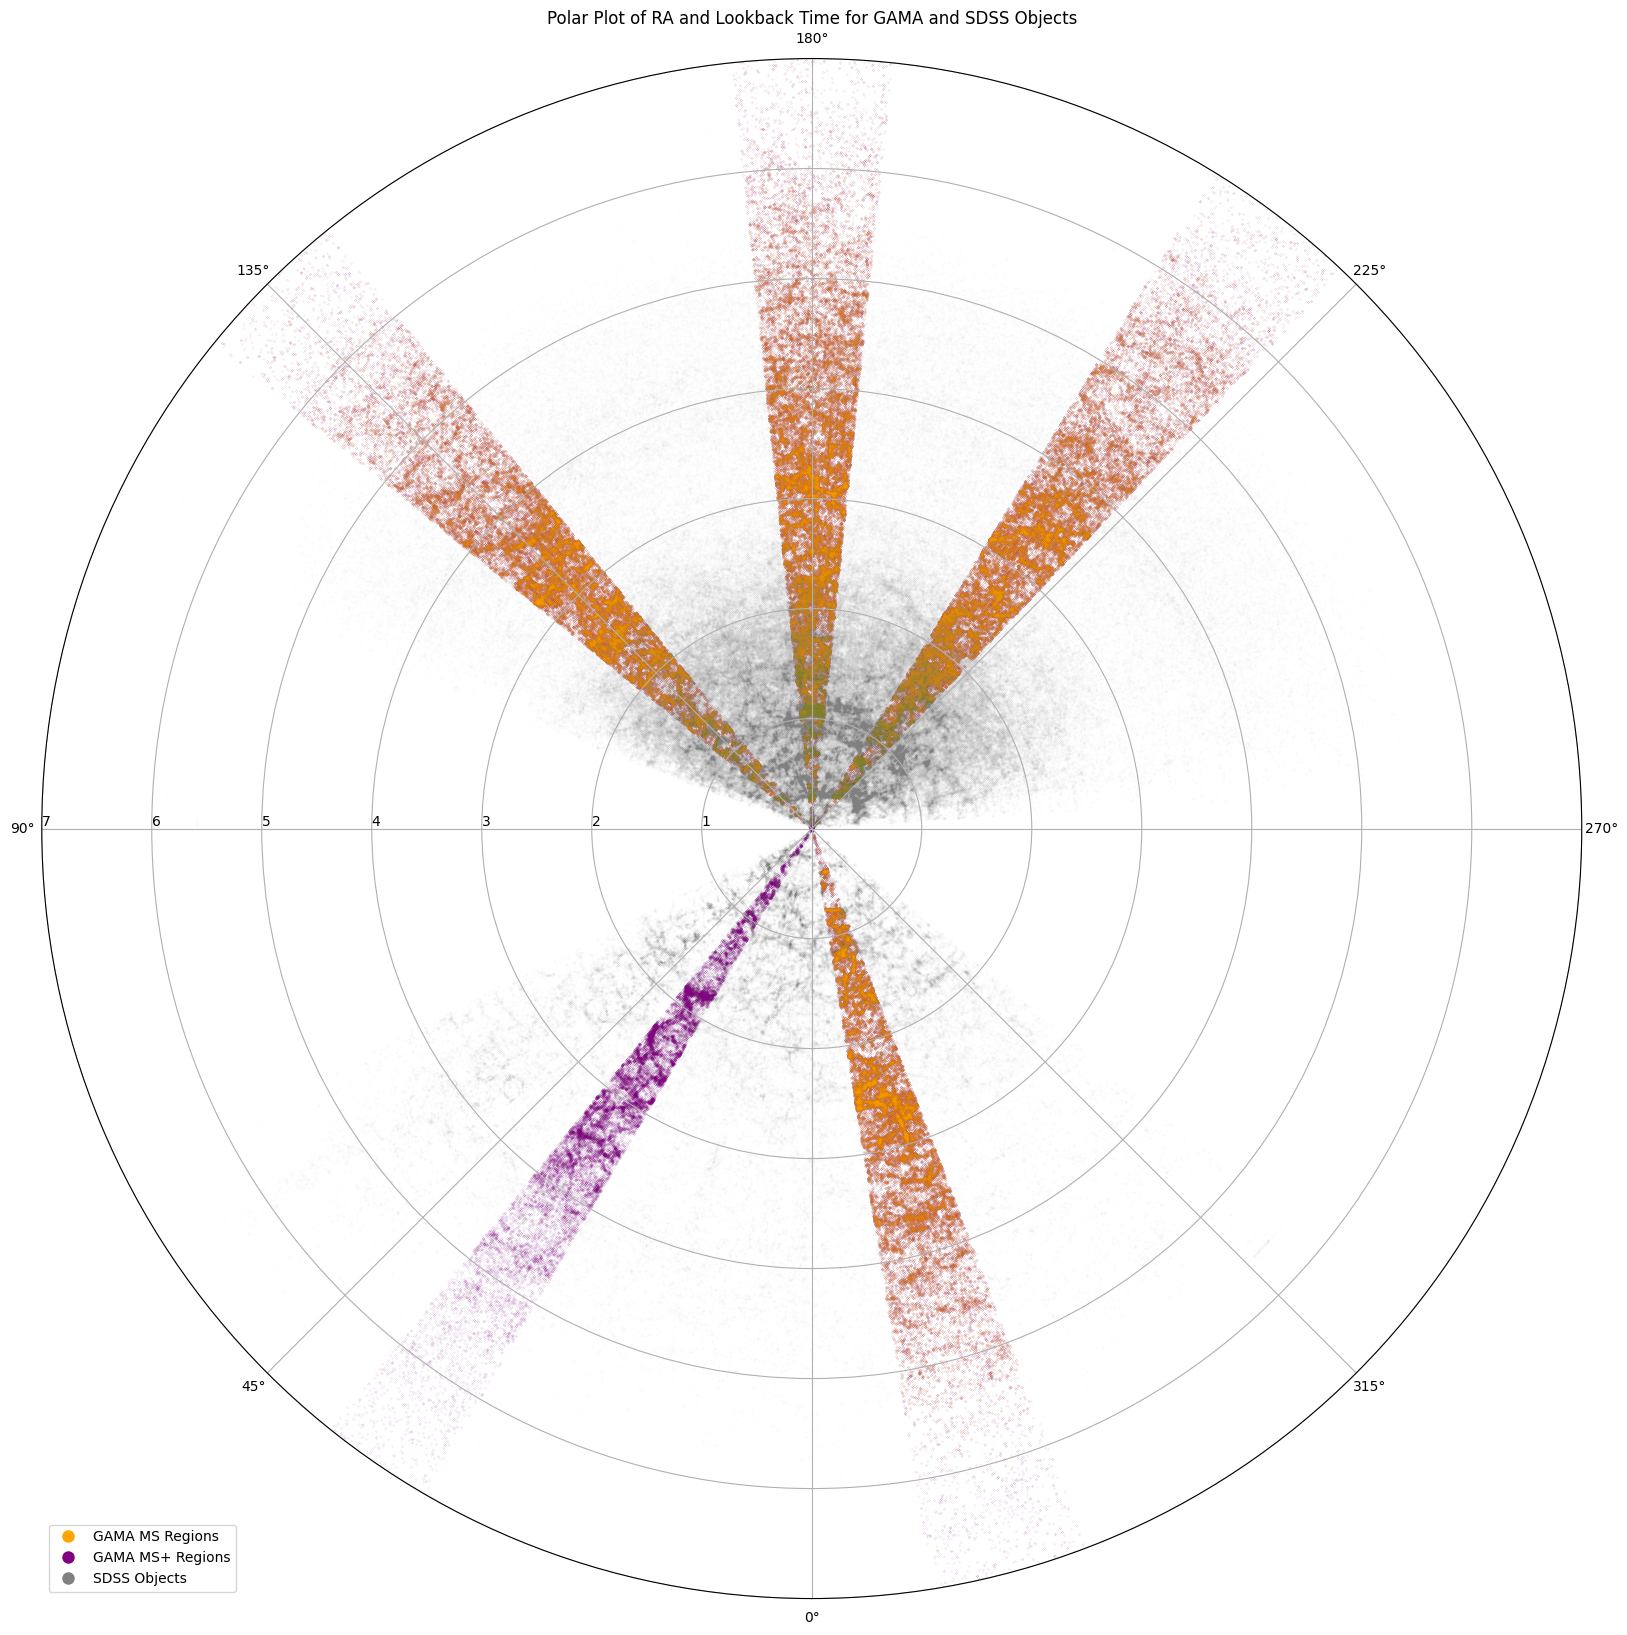

In [54]:
# Plot_ upper


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(20, 20))

scatter_gama_ms_plus = ax.scatter(
    combined_dataframe_plus['RA_rad'].values,
    combined_dataframe_plus['lookbacktime'].values,
    s=0.003,
    c='purple',
    label="GAMA_MS_Plus Regions"
)

scatter_gama_ms = ax.scatter(
    combined_dataframe['RA_rad'].values,
    combined_dataframe['lookbacktime'].values,
    s=0.003,
    c='orange',
    label="GAMA_MS Regions"
)

scatter_sdss = ax.scatter(
    SDSS_objects['RA_rad'].values,
    SDSS_objects['lookbacktime'].values,
    s=0.0001,
    c='gray',
    label="SDSS Objects"
)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label="GAMA MS Regions"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label="GAMA MS+ Regions"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray'  , markersize=10, label="SDSS Objects"),
]

ax.legend(handles=legend_handles)

ax.set_theta_direction(-1)
ax.set_theta_zero_location("S")
ax.set_rlabel_position(90)
ax.set_rmax(7)
ax.set_rmin(0)
plt.title("Polar Plot of RA and Lookback Time for GAMA and SDSS Objects")
plt.show()

In [55]:
# Z_SDSS = {'SDSS': SDSS_test[SDSS_test['Z'] >= 0]['Z']}
Z_SDSS = {'SDSS': fix_data_format(SDSS_objects[SDSS_objects['Z'] >= 0]['Z'].values)}
Z_GAMA_MS = {'GAMA_MS': combined_dataframe[combined_dataframe['Z'] >= 0]['Z']}
Z_GAMA_Plus = {'GAMA_Plus': combined_dataframe_plus[combined_dataframe_plus['Z'] >= 0]['Z']}

Z_GAMA_ALL = {'GAMA_ALL': gkvScienceSpevObj[gkvScienceSpevObj['Z'] >= 0]['Z']}

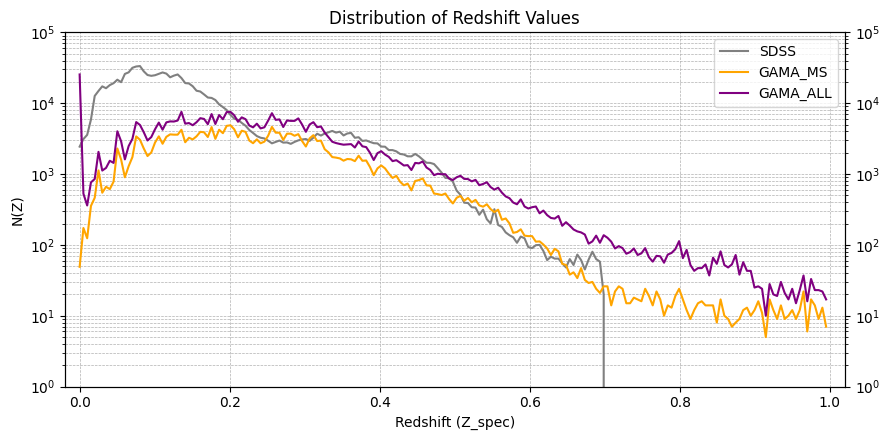

In [57]:
# Plot_ bottom


fig, ax = plt.subplots(figsize=(9, 4.5))

for dataset, color in zip([Z_SDSS, Z_GAMA_MS, Z_GAMA_ALL], ['gray', 'orange', 'purple']):
    for label, Z in dataset.items():
        hist, edges = np.histogram(Z, bins=np.linspace(0, 1, 200), range=(0, 1))
        ax.plot(edges[:-1], hist, color=color, label=label)

ax.set_xlabel('Redshift (Z_spec)')
ax.set_ylabel('N(Z)')
ax.set_title('Distribution of Redshift Values')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_yscale('log')
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(1, 10 ** 5)

# Create a twin y-axis
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylim(ax.get_ylim())

plt.tight_layout()
plt.show()


SDSS OBJECTS:
               Z       RAcen    RA_rad  lookbacktime
0       0.021222  146.714203  2.560646      0.301504
1       0.064656  146.628570  2.559151      0.890401
2       0.052654  146.631648  2.559205      0.731340
3       0.121270  146.934121  2.564484      1.605056
4       0.055981  146.965602  2.565034      0.775698
...          ...         ...       ...           ...
619725  0.097757  183.951879  3.210566      1.315201
619726  0.074907  183.953244  3.210590      1.024097
619727 -0.000139  181.688592  3.171064     -0.002004
619728  0.075336  180.779255  3.155193      1.029658
619729  0.073720  183.442800  3.201681      1.008720

[619730 rows x 4 columns]
Z_max SDSS:            0.14999955892562866
lookbacktime_Max_SDSS: 1.9464297774539006


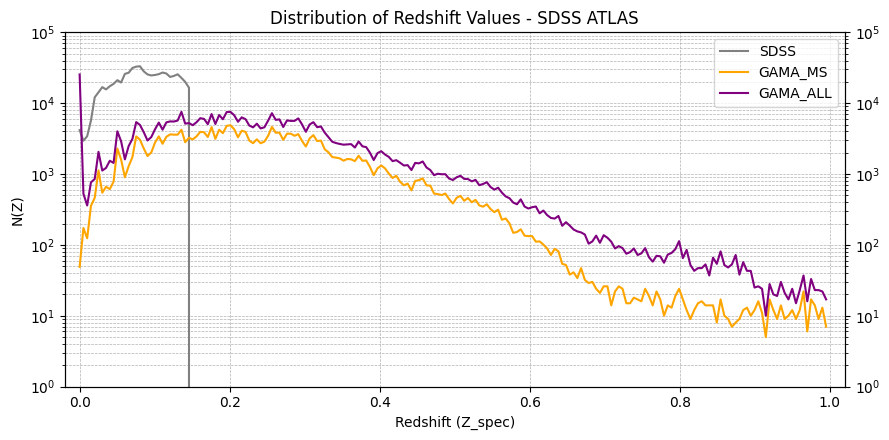